In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("scraped_bookdata.csv")


In [3]:
# Convert Rating text to numeric
rating_map = {
    'One': 1,
    'Two': 2,
    'Three': 3,
    'Four': 4,
    'Five': 5
}
df['Rating_num'] = df['Rating'].map(rating_map)

# Set visual style
sns.set(style="whitegrid")

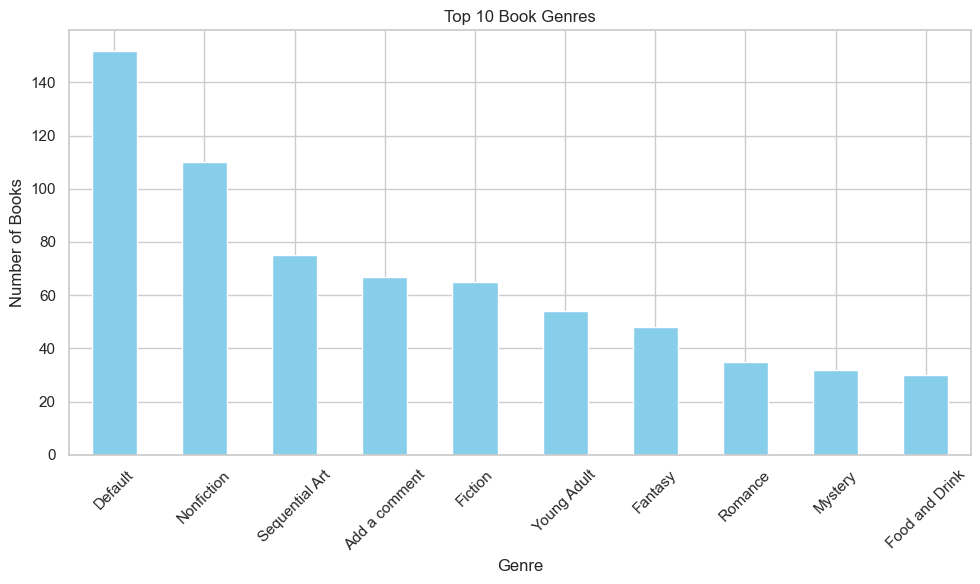

In [5]:
plt.figure(figsize=(10, 6))
df['Genre'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 Book Genres")
plt.xlabel("Genre")
plt.ylabel("Number of Books")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


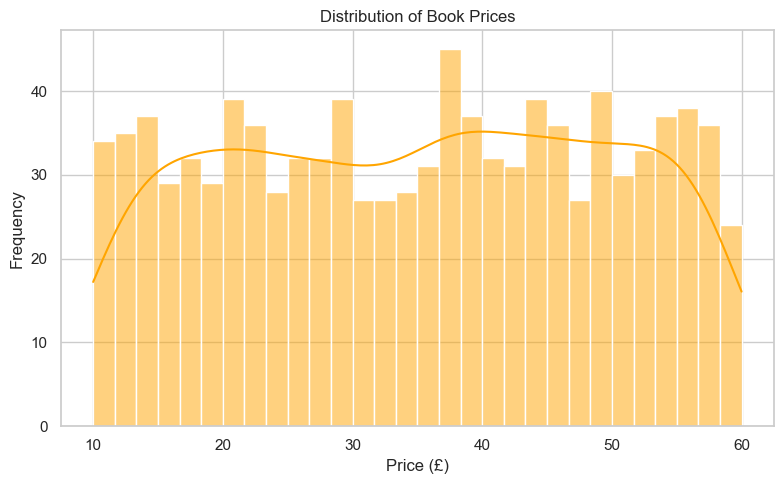

In [7]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Price (GBP)'], bins=30, color='orange', kde=True)
plt.title("Distribution of Book Prices")
plt.xlabel("Price (£)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

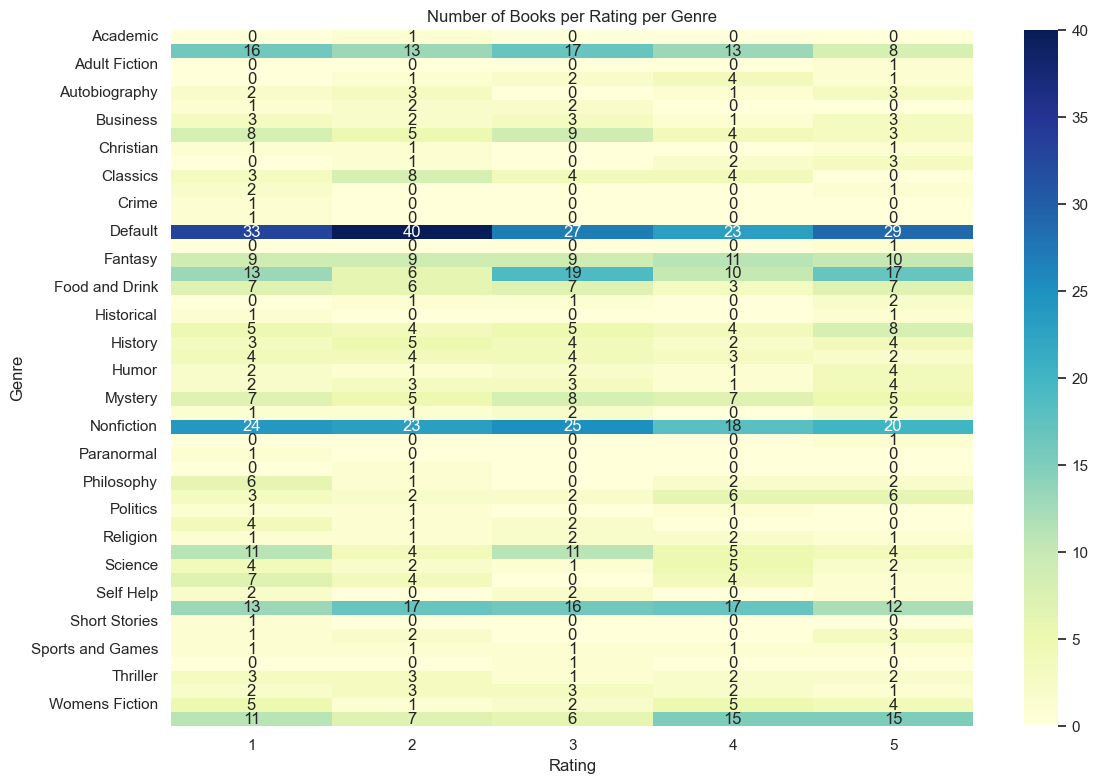

In [9]:
pivot_table = pd.pivot_table(df, values='Title', index='Genre', columns='Rating', aggfunc='count', fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title("Number of Books per Rating per Genre")
plt.xlabel("Rating")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()

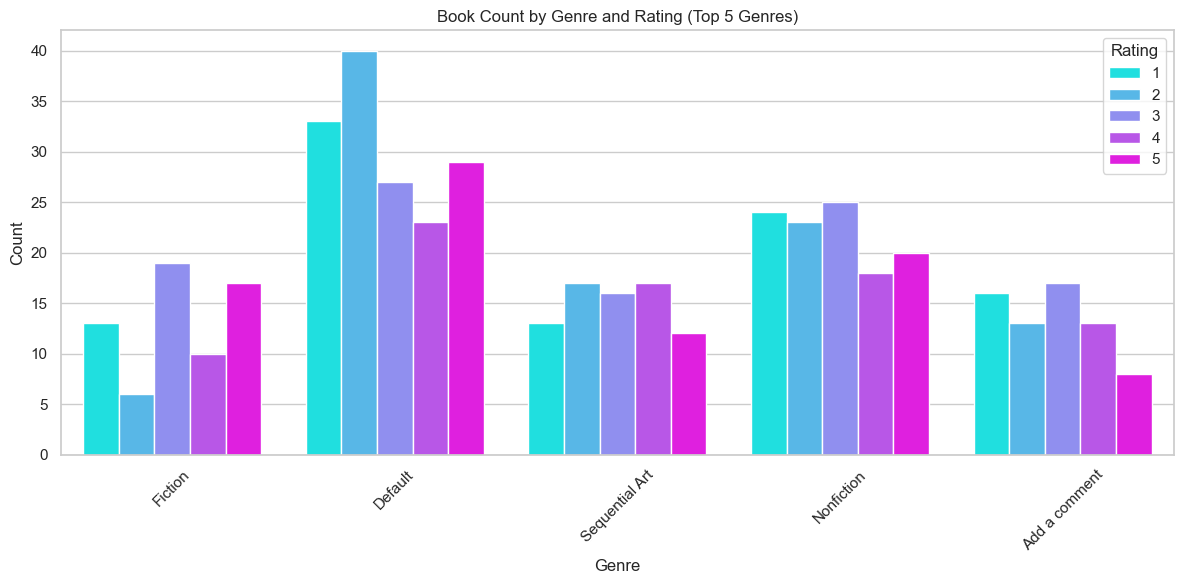

In [11]:
top_genres_list = df['Genre'].value_counts().head(5).index.tolist()
filtered_df = df[df['Genre'].isin(top_genres_list)]
plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_df, x='Genre', hue='Rating', palette='cool')
plt.title("Book Count by Genre and Rating (Top 5 Genres)")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

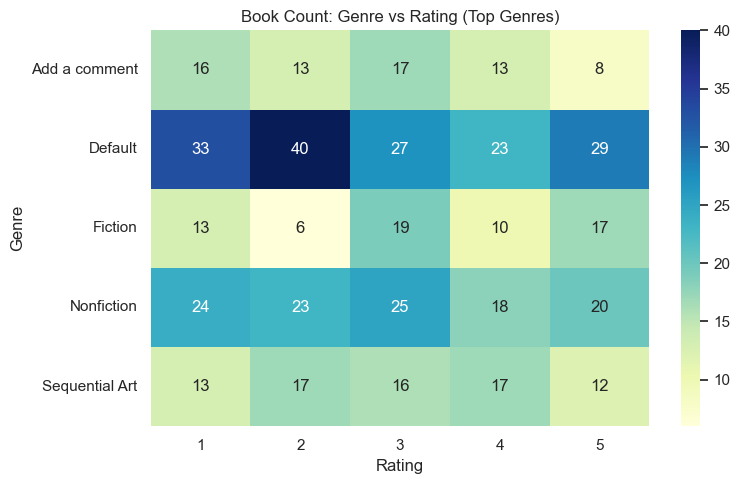

In [13]:
heat_data = pd.crosstab(filtered_df['Genre'], filtered_df['Rating'])
plt.figure(figsize=(8, 5))
sns.heatmap(heat_data, annot=True, cmap='YlGnBu', fmt='d')
plt.title("Book Count: Genre vs Rating (Top Genres)")
plt.xlabel("Rating")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()

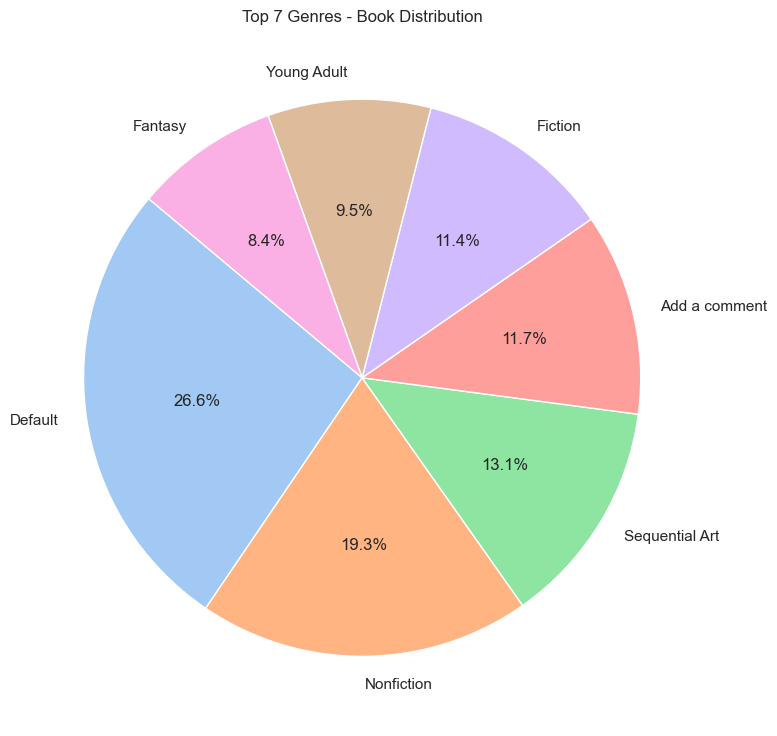

In [23]:
genre_counts = df['Genre'].value_counts().head(7)
plt.figure(figsize=(8, 8))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title("Top 7 Genres - Book Distribution")
plt.tight_layout()
plt.show()

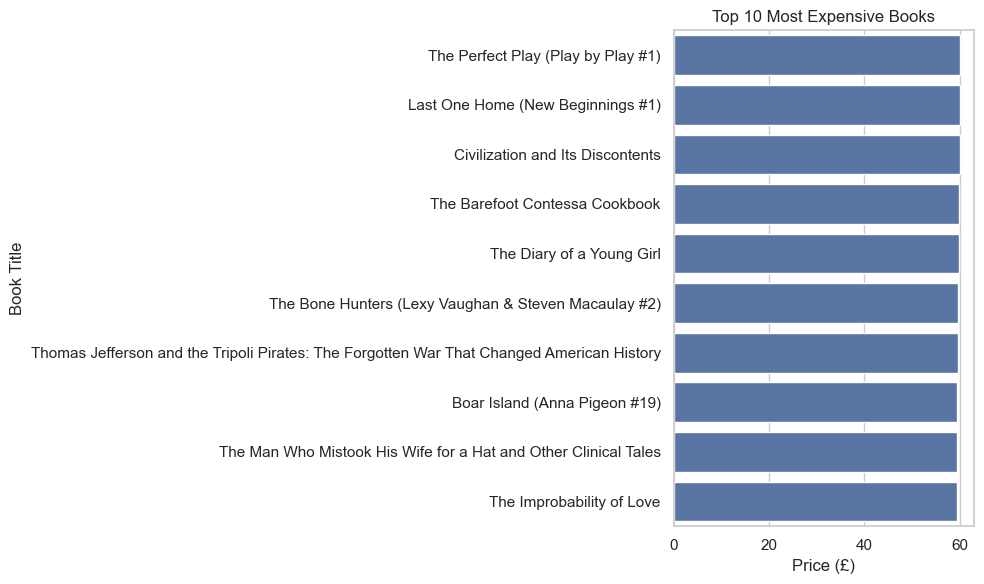

In [27]:
top_expensive = df.sort_values(by='Price (GBP)', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='Price (GBP)', y='Title', data=top_expensive)
plt.title("Top 10 Most Expensive Books")
plt.xlabel("Price (£)")
plt.ylabel("Book Title")
plt.tight_layout()
plt.show()